In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.stats import norm, gaussian_kde
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# For making the regression models was important to relate the lineups, and the players in it, the labels obtained and the data of all players. The result is a pandas Data Frame with the 5-man lineup, 8 columns representing each cluster and the sum of probabilites of each player in the lineup and an adjusted Net Rating that is the target column to predict. 

In [2]:
#Upload all the csv's available to merge them later. 
cluster_data = pd.read_csv('Data_2009_2019.csv')
cluster_data = cluster_data[cluster_data['GP'] >=20]
cluster_data=cluster_data.set_index(['Player','Tm','GP'])
cluster_data=cluster_data.drop('Unnamed: 0',axis=1)
labels=pd.read_csv('labels for 8 clusters.csv')
lineup_2009=pd.read_csv('lineup_2008.csv',encoding='ISO-8859–1')
lineup_2010=pd.read_csv('lineup_2009.csv',encoding='ISO-8859–1')
lineup_2011=pd.read_csv('lineup_2011.csv')
lineup_2012=pd.read_csv('lineup_2012.csv')
lineup_2013=pd.read_csv('lineup_2013.csv')
lineup_2014=pd.read_csv('lineup_2014.csv')
lineup_2015=pd.read_csv('lineup_2015.csv')
lineup_2016=pd.read_csv('lineup_2016.csv')
lineup_2017=pd.read_csv('lineup_2017.csv')
lineup_2018=pd.read_csv('lineup_2018.csv')
lineup_2019=pd.read_csv('lineup_2019.csv')
#Concatenate all the lineup csv's to a unique one. 
all_lineups=pd.concat([lineup_2009,lineup_2010,lineup_2011,lineup_2012,lineup_2013,lineup_2014,lineup_2015
                      ,lineup_2016,lineup_2017,lineup_2018,lineup_2019])
all_lineups=all_lineups.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'],axis=1)
all_lineups['PTS']=all_lineups['PTS'].astype('float64')

In [3]:
 #Concatenate the labels and all the players data
all_data=pd.concat([cluster_data.reset_index(),labels],axis=1)
all_data['Player']=all_data['Player']+all_data['Tm']
all_data=all_data.drop('Unnamed: 0',axis=1).set_index('Player')
all_data

,Tm,GP,FGA,3P%,2P%,FT%,PTS,Height,PER,3PAr,...,10-3P,Prob. cluster 0,Prob. cluster 1,Prob. cluster 2,Prob. cluster 3,Prob. cluster 4,Prob. cluster 5,Prob. cluster 6,Prob. cluster 7,labels
Player,,,,,,,,,,,,,,,,,,,,,
Arron Afflalo 2010DEN,DEN,82,13.3,0.434,0.488,0.735,16.5,196,10.9,0.426,...,0.1300,0.990,0.0,0.000,0.010,0.000,0.000,0.0,0.0,0
LaMarcus Aldridge 2010POR,POR,78,21.9,0.313,0.498,0.757,26.1,211,18.2,0.014,...,0.2620,0.000,0.0,0.016,0.000,0.000,0.984,0.0,0.0,5
Malik Allen 2010DEN,DEN,51,12.9,0.167,0.409,0.923,11.7,208,5.9,0.052,...,0.3450,0.000,0.0,0.000,0.000,0.000,1.000,0.0,0.0,5
Ray Allen* 2010BOS,BOS,80,18.1,0.363,0.556,0.913,24.2,196,15.2,0.410,...,0.1400,0.511,0.0,0.000,0.002,0.487,0.000,0.0,0.0,0
Tony Allen 2010BOS,BOS,54,14.9,0.000,0.520,0.605,19.4,193,14.2,0.020,...,0.0985,0.000,1.0,0.000,0.000,0.000,0.000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trae Young 2019ATL,ATL,81,23.2,0.324,0.477,0.829,28.6,185,17.0,0.384,...,0.1045,0.000,0.0,0.000,0.000,1.000,0.000,0.0,0.0,4
Cody Zeller 2019CHO,CHO,49,13.5,0.273,0.570,0.787,19.4,213,17.2,0.064,...,0.0320,0.000,0.0,0.000,0.000,0.000,1.000,0.0,0.0,5
Ante Zizi? 2019CLE,CLE,59,15.2,0.000,0.553,0.705,21.1,208,16.2,0.000,...,0.0725,0.000,0.0,0.000,0.000,0.000,0.000,0.0,1.0,7


# Based on an empirical bayes component, an adjustement for the Net Rating was made due to the noisy data, and posible outliers. 
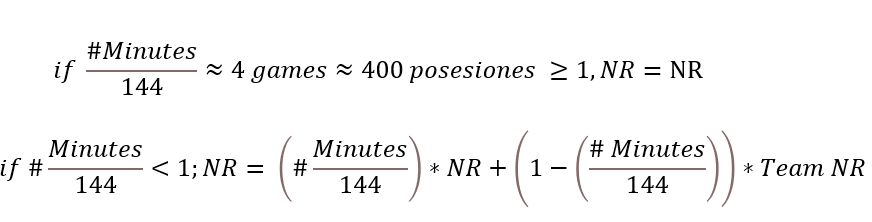

In [4]:
#Add the team abreviation to each of the players name.
all_lineups['Player1']=all_lineups['Player1']+all_lineups['Tm']
all_lineups['Player2']=all_lineups['Player2']+all_lineups['Tm']
all_lineups['Player3']=all_lineups['Player3']+all_lineups['Tm']
all_lineups['Player4']=all_lineups['Player4']+all_lineups['Tm']
all_lineups['Player5']=all_lineups['Player5']+all_lineups['Tm']

#Filter the data using lineups with Net rating between (-25, 25)
all_lineups=all_lineups[all_lineups['New PTS']<25]
all_lineups=all_lineups[all_lineups['New PTS']>-25]
all_lineups

,Rk,Player1,Player2,Player3,Player4,Player5,MP,PTS,New PTS,Tm
0,0,Mike Bibby 2009ATL,Al Horford 2009ATL,Joe Johnson 2009ATL,Josh Smith 2009ATL,Marvin Williams 2009ATL,567.29,-4.6,-4.600000,ATL
1,1,Mike Bibby 2009ATL,Maurice Evans 2009ATL,Al Horford 2009ATL,Joe Johnson 2009ATL,Josh Smith 2009ATL,316.13,-1.8,-1.800000,ATL
2,2,Mike Bibby 2009ATL,Al Horford 2009ATL,Joe Johnson 2009ATL,Ronald Murray 2009ATL,Josh Smith 2009ATL,208.25,14.6,14.600000,ATL
3,3,Mike Bibby 2009ATL,Joe Johnson 2009ATL,Zaza Pachulia 2009ATL,Josh Smith 2009ATL,Marvin Williams 2009ATL,194.57,-3.3,-3.300000,ATL
4,4,Mike Bibby 2009ATL,Al Horford 2009ATL,Joe Johnson 2009ATL,Zaza Pachulia 2009ATL,Marvin Williams 2009ATL,133.12,3.0,3.279067,ATL
...,...,...,...,...,...,...,...,...,...,...
546,595,Bradley Beal 2019WAS,Jeff Green 2019WAS,Kelly Oubre Jr. 2019WAS,Austin Rivers 2019WAS,John Wall 2019WAS,42.18,9.7,0.709979,WAS
547,596,Bradley Beal 2019WAS,Jeff Green 2019WAS,Markieff Morris 2019WAS,Austin Rivers 2019WAS,Tomás Satoranský 2019WAS,40.55,-10.2,-3.590669,WAS
548,597,Trevor Ariza 2019WAS,Bradley Beal 2019WAS,Thomas Bryant 2019WAS,Jeff Green 2019WAS,Chasson Randle 2019WAS,38.57,-12.3,-3.926120,WAS
549,598,Troy Brown Jr. 2019WAS,Thomas Bryant 2019WAS,Jabari Parker 2019WAS,Chasson Randle 2019WAS,Tomás Satoranský 2019WAS,37.53,1.6,-1.152344,WAS


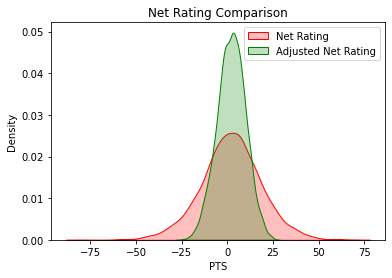

In [5]:
sn.kdeplot(all_lineups['PTS'], color="red", shade=True, label='Net Rating')
sn.kdeplot(all_lineups['New PTS'], color="green", shade=True, label='Adjusted Net Rating')
plt.title('Net Rating Comparison')
plt.legend()
plt.show()

This huge code was made to locate each player of the lineups in the all_data DataFrame and add his probabilities of being in each cluster. 

In [6]:
pl1=all_lineups['Player1'].to_numpy()
pl2=all_lineups['Player2'].to_numpy()
pl3=all_lineups['Player3'].to_numpy()
pl4=all_lineups['Player4'].to_numpy()
pl5=all_lineups['Player5'].to_numpy()
prueba_2=[]
for i in range(len(all_lineups)):
    prueba_2.append([pl1[i],all_data.loc[pl1[i]]['Prob. cluster 0'],all_data.loc[pl1[i]]['Prob. cluster 1'],
        all_data.loc[pl1[i]]['Prob. cluster 2'],all_data.loc[pl1[i]]['Prob. cluster 3'],
        all_data.loc[pl1[i]]['Prob. cluster 4'],all_data.loc[pl1[i]]['Prob. cluster 5'],
        all_data.loc[pl1[i]]['Prob. cluster 6'],all_data.loc[pl1[i]]['Prob. cluster 7'],
        pl2[i],all_data.loc[pl2[i]]['Prob. cluster 0'],all_data.loc[pl2[i]]['Prob. cluster 1'],
        all_data.loc[pl2[i]]['Prob. cluster 2'],all_data.loc[pl2[i]]['Prob. cluster 3'],
        all_data.loc[pl2[i]]['Prob. cluster 4'],all_data.loc[pl2[i]]['Prob. cluster 5'],
        all_data.loc[pl2[i]]['Prob. cluster 6'],all_data.loc[pl2[i]]['Prob. cluster 7'],
        pl3[i],all_data.loc[pl3[i]]['Prob. cluster 0'],all_data.loc[pl3[i]]['Prob. cluster 1'],
        all_data.loc[pl3[i]]['Prob. cluster 2'],all_data.loc[pl3[i]]['Prob. cluster 3'],
        all_data.loc[pl3[i]]['Prob. cluster 4'],all_data.loc[pl3[i]]['Prob. cluster 5'],
        all_data.loc[pl3[i]]['Prob. cluster 6'],all_data.loc[pl3[i]]['Prob. cluster 7'],
        pl4[i],all_data.loc[pl4[i]]['Prob. cluster 0'],all_data.loc[pl4[i]]['Prob. cluster 1'],
        all_data.loc[pl4[i]]['Prob. cluster 2'],all_data.loc[pl4[i]]['Prob. cluster 3'],
        all_data.loc[pl4[i]]['Prob. cluster 4'],all_data.loc[pl4[i]]['Prob. cluster 5'],
        all_data.loc[pl4[i]]['Prob. cluster 6'],all_data.loc[pl4[i]]['Prob. cluster 7'],
        pl5[i],all_data.loc[pl5[i]]['Prob. cluster 0'],all_data.loc[pl5[i]]['Prob. cluster 1'],
        all_data.loc[pl5[i]]['Prob. cluster 2'],all_data.loc[pl5[i]]['Prob. cluster 3'],
        all_data.loc[pl5[i]]['Prob. cluster 4'],all_data.loc[pl5[i]]['Prob. cluster 5'],
        all_data.loc[pl5[i]]['Prob. cluster 6'],all_data.loc[pl5[i]]['Prob. cluster 7']])

In [7]:
#Create the new DataFrame. 
columns=['P1','P1C0','P1C1','P1C2','P1C3','P1C4','P1C5','P1C6','PIC7',
        'P2','P2C0','P2C1','P2C2','P2C3','P2C4','P2C5','P2C6','P2C7',
        'P3','P3C0','P3C1','P3C2','P3C3','P3C4','P3C5','P3C6','P3C7',
        'P4','P4C0','P4C1','P4C2','P4C3','P4C4','P4C5','P4C6','P4C7',
        'P5','P5C0','P5C1','P5C2','P5C3','P5C4','P5C5','P5C6','P5C7',]
a=pd.DataFrame(prueba_2,columns=columns)

In [8]:
#Sum the probabilities of each player to get a total for the whole lineup
a['Tot prob 0']=a['P1C0']+a['P2C0']+a['P3C0']+a['P4C0']+a['P5C0']
a['Tot prob 1']=a['P1C1']+a['P2C1']+a['P3C1']+a['P4C1']+a['P5C1']
a['Tot prob 2']=a['P1C2']+a['P2C2']+a['P3C2']+a['P4C2']+a['P5C2']
a['Tot prob 3']=a['P1C3']+a['P2C3']+a['P3C3']+a['P4C3']+a['P5C3']
a['Tot prob 4']=a['P1C4']+a['P2C4']+a['P3C4']+a['P4C4']+a['P5C4']
a['Tot prob 5']=a['P1C5']+a['P2C5']+a['P3C5']+a['P4C5']+a['P5C5']
a['Tot prob 6']=a['P1C6']+a['P2C6']+a['P3C6']+a['P4C6']+a['P5C6']
a['Tot prob 7']=a['PIC7']+a['P2C7']+a['P3C7']+a['P4C7']+a['P5C7']
a['NRating']=all_lineups['New PTS'].tolist()
a['Rating']=all_lineups['PTS'].tolist()
a

,P1,P1C0,P1C1,P1C2,P1C3,P1C4,P1C5,P1C6,PIC7,P2,...,Tot prob 0,Tot prob 1,Tot prob 2,Tot prob 3,Tot prob 4,Tot prob 5,Tot prob 6,Tot prob 7,NRating,Rating
0,Mike Bibby 2009ATL,0.000,0.0,0.0,0.002,0.998,0.000,0.0,0.0,Al Horford 2009ATL,...,0.520,0.0,1.480,0.002,1.998,0.000,0.00,1.0,-4.600000,-4.6
1,Mike Bibby 2009ATL,0.000,0.0,0.0,0.002,0.998,0.000,0.0,0.0,Maurice Evans 2009ATL,...,1.000,0.0,1.000,0.002,1.998,0.000,0.00,1.0,-1.800000,-1.8
2,Mike Bibby 2009ATL,0.000,0.0,0.0,0.002,0.998,0.000,0.0,0.0,Al Horford 2009ATL,...,0.001,0.0,1.001,0.002,2.996,0.000,0.00,1.0,14.600000,14.6
3,Mike Bibby 2009ATL,0.000,0.0,0.0,0.002,0.998,0.000,0.0,0.0,Joe Johnson 2009ATL,...,0.520,0.0,1.480,0.002,1.998,0.000,0.00,1.0,-3.300000,-3.3
4,Mike Bibby 2009ATL,0.000,0.0,0.0,0.002,0.998,0.000,0.0,0.0,Al Horford 2009ATL,...,0.520,0.0,0.480,0.002,1.998,0.000,0.00,2.0,3.279067,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,Bradley Beal 2019WAS,0.000,0.0,0.0,0.000,1.000,0.000,0.0,0.0,Jeff Green 2019WAS,...,1.998,0.0,0.905,1.000,1.097,0.000,0.00,0.0,0.709979,9.7
6295,Bradley Beal 2019WAS,0.000,0.0,0.0,0.000,1.000,0.000,0.0,0.0,Jeff Green 2019WAS,...,1.993,0.0,1.007,1.000,1.000,0.000,0.00,0.0,-3.590669,-10.2
6296,Trevor Ariza 2019WAS,0.999,0.0,0.0,0.001,0.000,0.000,0.0,0.0,Bradley Beal 2019WAS,...,1.999,0.0,0.620,0.076,1.925,0.000,0.38,0.0,-3.926120,-12.3
6297,Troy Brown Jr. 2019WAS,0.001,0.0,0.0,0.000,0.000,0.999,0.0,0.0,Thomas Bryant 2019WAS,...,0.001,0.0,2.620,0.075,0.925,0.999,0.38,0.0,-1.152344,1.6
